# Perceptron Neural Network
In this notebook, we will look at the most fundamental type of neural network called Perceptron Neural Network. We will create a neural network for recognising handwritten digits using Python's Keras library and also implement our own neural network from scratch to perform the same task.

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

from timeit import default_timer
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
# Loading data and taking a look its format 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

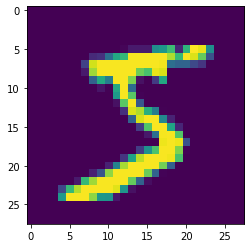

In [3]:
# visualise the data
plt.imshow(X_train[0])
plt.show()

In [4]:
# the images are 28 by 28 pixels of values ranging between 0 and 255
# we first need to reshape the data so that it can be used as an input to our network
pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], pixels))
X_test = X_test.reshape((X_test.shape[0], pixels))

In [5]:
# we will normalise the data 
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# we will convert y_train and y_test to categorical matrices
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# look at the number of output categories
n_categories = y_train.shape[1]
n_categories

10

In [8]:
# building a neural network using keras
def digit_classifier():
    model = Sequential()
    # hidden layers
    model.add(Dense(100, activation='relu', input_shape=(pixels,)))
    model.add(Dense(100, activation='relu'))
    # output layer
    model.add(Dense(n_categories, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
# training the model
clf = digit_classifier()
clf.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.2512 - accuracy: 0.9258 - val_loss: 0.1284 - val_accuracy: 0.9596
Epoch 2/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.1069 - accuracy: 0.9682 - val_loss: 0.0940 - val_accuracy: 0.9710
Epoch 3/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0744 - accuracy: 0.9765 - val_loss: 0.0851 - val_accuracy: 0.9743
Epoch 4/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0559 - accuracy: 0.9822 - val_loss: 0.0887 - val_accuracy: 0.9748
Epoch 5/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0446 - accuracy: 0.9855 - val_loss: 0.0778 - val_accuracy: 0.9771
Epoch 6/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0368 - accuracy: 0.9878 - val_loss: 0.0841 - val_accuracy: 0.9750
Epoch 7/10
60000/60000 [==============================] - 9s 

In [10]:
# evaluate the accuracy of the model using testing data
loss, accuracy = clf.evaluate(X_test, y_test)
print('loss of network: {}'.format(loss))
print('accuracy of network on test data: {}'.format(accuracy))

10000/10000 [==============================] - 1s 58us/step
loss of network: 0.10414411052670912
accuracy of network on test data: 0.9753999710083008


In [11]:
# My implementation of neural network
class NeuralNetwork:
    
    def __init__(self, n):
        """init method
        :arg n: 1darray or list containing the number of nodes in each layer in the network
        """
        # initialise network attributes
        self.layers = len(n)
        self.weights = [np.sqrt(2 / n[l - 1]) * np.random.randn(n[l], n[l - 1]) for l in range(1, len(n))]
        self.biases = [0.01 * np.ones(n[l]) for l in range(1, len(n))]
    
    def predict(self, X):
        """this method predicts the outputs of inputs X using forward propagation.
        :arg X: ndarray of dimensions m by n where m is the number of data points and n is the number of features
        :return outputs: ndarray of outputs from the network
        """
        # initialise prediction matrix
        m = X.shape[0]
        n = self.biases[-1].shape[0]
        outputs = np.zeros((m, n))
        
        for i in range(m):
            inputs = X[i]
            
            # forward prop
            for layer in range(self.layers - 1):
                z = np.sum(self.weights[layer] * inputs, axis=1) + self.biases[layer]
                a = self.relu(z) if layer != self.layers - 2 else self.sigmoid(z)
                inputs = a
            outputs[i] = inputs
        return outputs
    
    def evaluate(self, X, y):
        """this method evaluates the accuracy of the outputs from the neural network using y as the ground truth.
        :arg X: ndarray of training data
        :arg y: ndarray of expected outputs
        :return accuracy: the accuracy of the predictions made using the neural network
        """
        y_hat = self.predict(X)
        return np.sum(np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)) / len(y_hat)
    
    def train(self, X, y, batchsize=32, epochs=10, eta=0.01):
        """this method trains the neural network using the entire data set.
        :arg X: ndarray of training data
        :arg y: ndarray of expected outputs
        :batchsize: (int) the number of data in each training batch
        :epochs: (int) the number of iterations through the entire training data
        :eta: (float) the learning rate of the network
        """
        for epoch in range(epochs):
            # initialise timer
            print('epoch {}...'.format(epoch + 1))
            start = default_timer()
            
            # train the data by batch
            for i in range(0, len(X), batchsize):
                self.train_mini_batch(X[i:i + batchsize], y[i:i + batchsize], eta)
                
            # calculate MSE to make sure that the network is training properly
            MSE = np.mean((y - self.predict(X)) ** 2)
            accuracy = self.evaluate(X, y)
            print('epoch {} completed -- MSE: {} -- time taken to train: {}s -- accuracy: {}'.format(epoch + 1, MSE, default_timer() - start, accuracy))
    
    def train_mini_batch(self, X, y, eta):
        """this method trains the network using one batch of the dataset.
        :arg X: ndarray of a batch of training data
        :arg y: ndarray of the expected outputs from the training data
        :arg eta: (float) learning rate of the network
        """
        # initialise gradient parameters
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        
        # perform forward prop and backprop for each data point in the batch
        for i in range(len(X)):
            delta_nabla_w, delta_nabla_b = self.backprop(X[i], y[i])
            nabla_w = [w + dw for w, dw in zip(nabla_w, delta_nabla_w)]
            nabla_b = [b + db for b, db in zip(nabla_b, delta_nabla_b)]
        
        # update weights and biases
        self.weights = [w - (eta / len(X)) * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - (eta / len(X)) * nb for b, nb in zip(self.biases, nabla_b)]
    
    def backprop(self, X, y):
        """this method performs one iteration of the backpropagation algorithm in the network
        :arg X: ndarray of a batch of training data
        :arg y: ndarray of the expected outputs from the training data
        :return nabla_w: list of ndarrays of partial derivatives of cost with respect to weights
        :return nabla_b: list of ndarrays of partial derivatives of cost with respect to biases
        """
        # initialise gradient parameters
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        
        inputs = X
        zs = []
        activations = [X]
        
        # forwardprop
        for layer in range(self.layers - 1):
            # calculate weighted sums
            z = np.sum(self.weights[layer] * inputs, axis=1) + self.biases[layer]
            # calculate activations
            a = self.relu(z) if layer != self.layers - 2 else self.sigmoid(z)
            
            zs.append(z)
            activations.append(a)
            inputs = a
        
        # backprop
        delta = (activations[-1] - y) * self.sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta.reshape((len(delta), 1)), activations[-2].reshape(1, len(activations[-2])))
        
        # calculate delta for hidden layers
        for l in range(2, self.layers):
            z = zs[-l]
            delta = np.sum(self.weights[-l + 1].T * delta, axis=1) * self.relu_prime(z)
            
            nabla_b[-l] = delta
            a = activations[-l - 1]
            nabla_w[-l] = np.dot(delta.reshape((len(delta), 1)), a.reshape(1, len(a)))
        
        return (nabla_w, nabla_b)
    
    def relu(self, z):
        """this method acts as the relu activation function
        :arg z: 1darray of weighted outputs from a layer
        """
        return np.maximum(0, z)

    def relu_prime(self, z):
        """this method acts as the derivation of the relu activation function
        :arg z: 1darray of weighted outputs from a layer
        """
        return np.where(z > 0, 1, 0)
    
    def sigmoid(self, z):
        """this method acts as the sigmoid activation function
        :arg z: 1darray of weighted outputs from a layer
        """
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_prime(self, z):
        """this method acts as the derivative of the sigmoid activation function
        :arg z: 1darray of weighted outputs from a layer
        """
        a = self.sigmoid(z)
        return a * (1 - a)

In [12]:
# training our neural network
n = [pixels, 100, 100, n_categories]
network = NeuralNetwork(n)
network.train(X_train, y_train, epochs=20)

epoch 1...
epoch 1 completed -- MSE: 0.04392331027115827 -- time taken to train: 119.9255211s -- accuracy: 0.728
epoch 2...
epoch 2 completed -- MSE: 0.029436232735420204 -- time taken to train: 108.61293460000002s -- accuracy: 0.85425
epoch 3...
epoch 3 completed -- MSE: 0.023223545072979617 -- time taken to train: 114.14436300000003s -- accuracy: 0.8800166666666667
epoch 4...
epoch 4 completed -- MSE: 0.02017143428357226 -- time taken to train: 111.5192854s -- accuracy: 0.8936
epoch 5...
epoch 5 completed -- MSE: 0.018259871459302444 -- time taken to train: 114.18007409999996s -- accuracy: 0.9019666666666667
epoch 6...
epoch 6 completed -- MSE: 0.016883735147000464 -- time taken to train: 107.52729529999999s -- accuracy: 0.9081166666666667
epoch 7...
epoch 7 completed -- MSE: 0.015807864551204604 -- time taken to train: 124.78141189999997s -- accuracy: 0.9132333333333333
epoch 8...
epoch 8 completed -- MSE: 0.014936764777263306 -- time taken to train: 124.58522419999997s -- accuracy:

In [15]:
print('accuracy of the network''s prediction of test data: {}'.format(network.evaluate(X_test, y_test)))

accuracy of the networks prediction of test data: 0.9441
